# Visual Analyses

In this notebook I heavily use the multiplex visualization library to visualize the sentiment score generated by the VADER
analyzer.

A number of visualizations are generated.

For a detailed report please view, the report pdf.

# Setup

In [1]:
import json
import importlib
import matplotlib.pyplot as plt
import os
import sys
from multiplex import drawable
from tqdm.notebook import tqdm
from collections import defaultdict
import pandas as pd

Load the daily mean score tweets into Language.

In [2]:
jsontweets = json.load(open('Data/MeanSentiment.json'))
tweets = {jsontweets[id]['month']: jsontweets[id]['day'] for id in jsontweets}
Language = tweets

Using the os library, get set the ```date_range``` variable to the files in the Data/FilteredTwitterIDs/ directory.

In [3]:
_date_range = os.listdir('Data/FilteredTwitterIDs/')
dates = {'Dec':[], 'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[]}
for date in _date_range:
    if '0' in date:
        new_date = '01/'
    if '1' in date:
        new_date = '07/'
    if '2' in date:
        new_date = '14/'
    if '3' in date:
        new_date = '21/'
    if '4' in date:
        if 'May' in date:
             new_date = '26/'
        else:
             new_date = '28/'

    if 'December' in date:
        new_date += '12'
        dates['Dec'].append(new_date)
    if 'January' in date:
        new_date += '01'
        dates['Jan'].append(new_date)
    if 'February' in date:
        new_date += '02'
        dates['Feb'].append(new_date)
    if 'March' in date:
        new_date += '03'
        dates['Mar'].append(new_date)
    if 'April' in date:
        new_date += '04'
        dates['Apr'].append(new_date)
    if 'May' in date:
        new_date += '05'
        dates['May'].append(new_date)

date_range = []

for month in dates:
    for date in dates[month]:
        date_range.append(date)

Set up the multiplex library styles for the daily sentiment visualizations.

In [4]:
drawable = importlib.reload(drawable)
# reload the style modern-academic
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex.style"))

# create a general style
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

en_style = { 'color': '#800020', 'label': 'English' }
es_style = { 'color': '#ffff00', 'label': 'Spanish' }
fr_style = { 'color': '#1560bd', 'label': 'French' }
de_style = { 'color': '#004b49', 'label': 'German' }
nl_style = { 'color': '#ff9933', 'label': 'Dutch' }
it_style = { 'color': '#00bfff', 'label': 'Italian' }

# Daily Mean Sentiment Plots

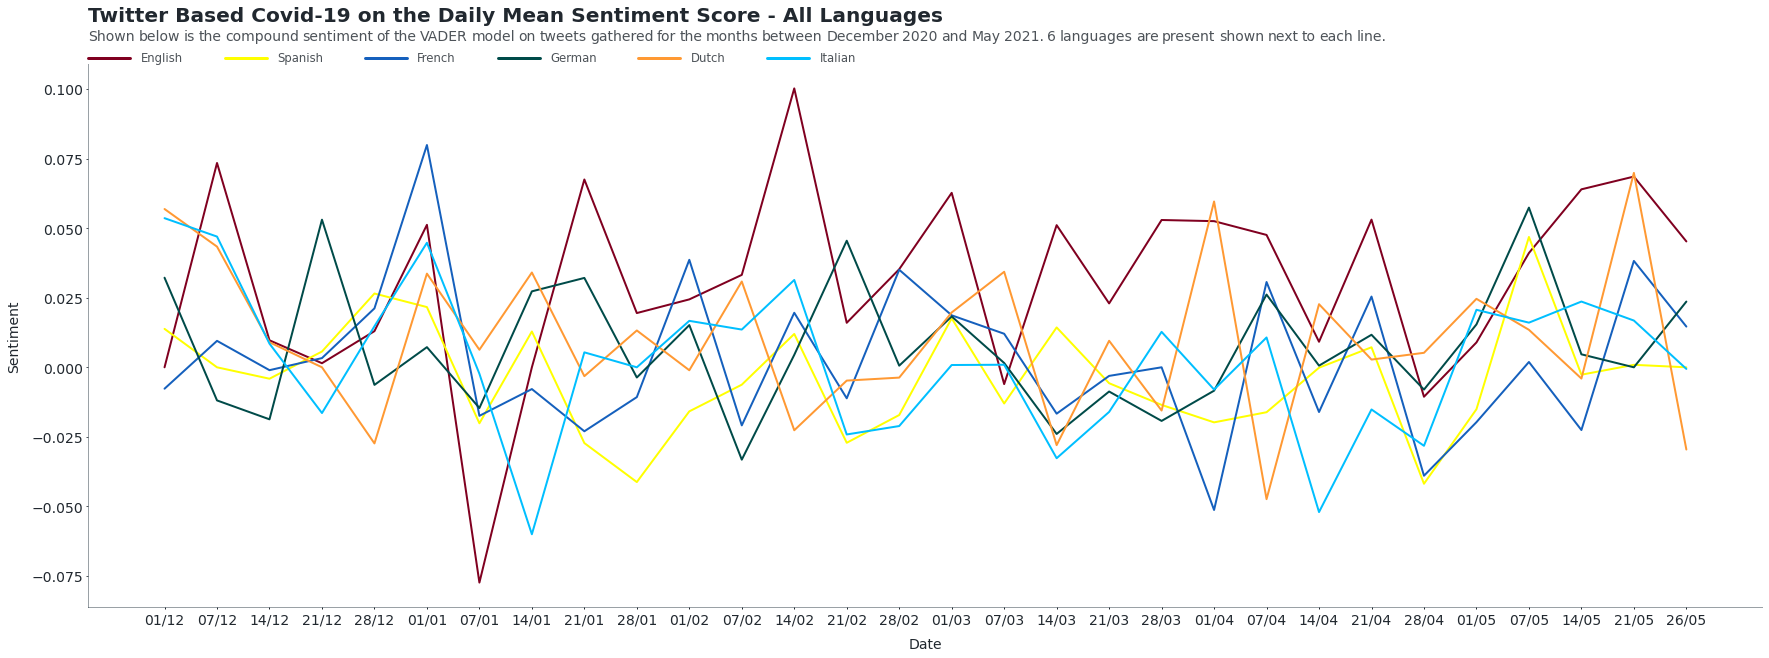

In [5]:
# draw the visualization
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[1], **style, **en_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[2], **style, **es_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[3], **style, **fr_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[4], **style, **de_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[5], **style, **nl_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[6], **style, **it_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - All Languages', loc='left')
viz.set_caption("""Shown below is the compound sentiment of the VADER model on tweets
                gathered for the months between December 2020 and May 2021.
                6 languages are present shown next to each line.
                """, align='justify')
viz.savefig(fname='Output/Daily Mean All',dpi=300, bbox_inches='tight')
viz.show()

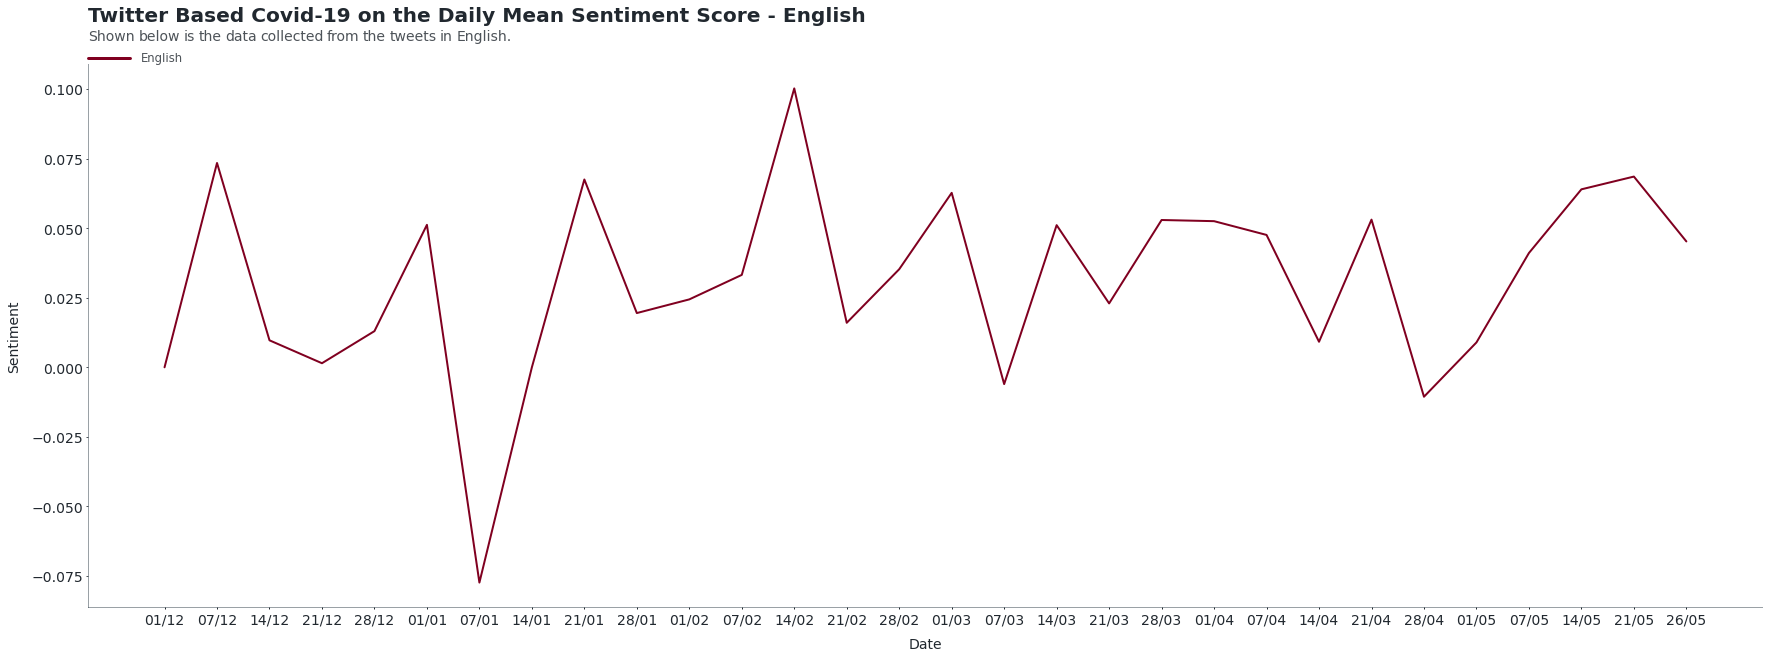

In [6]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[1], **style, **en_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - English', loc='left')
viz.set_caption("""Shown below is the data collected from the tweets in English.""", align='justify')
viz.savefig(fname='Output/Daily Mean English',dpi=300, bbox_inches='tight')

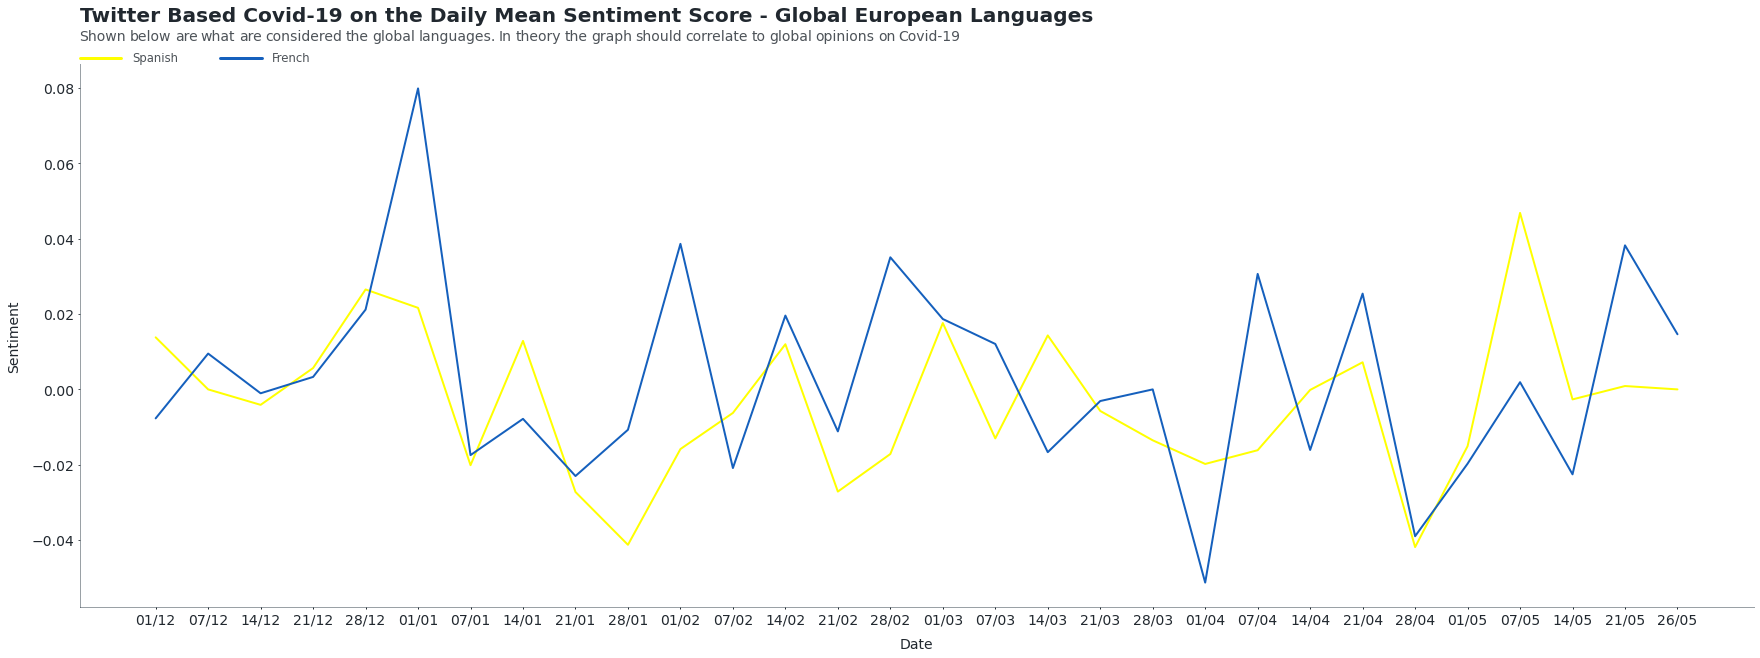

In [7]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[2], **style, **es_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[3], **style, **fr_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - Global European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the global languages.
                    In theory the graph should correlate to global opinions on Covid-19""", align='justify')
viz.savefig(fname='Output/Daily Mean Global',dpi=300, bbox_inches='tight')
viz.show()

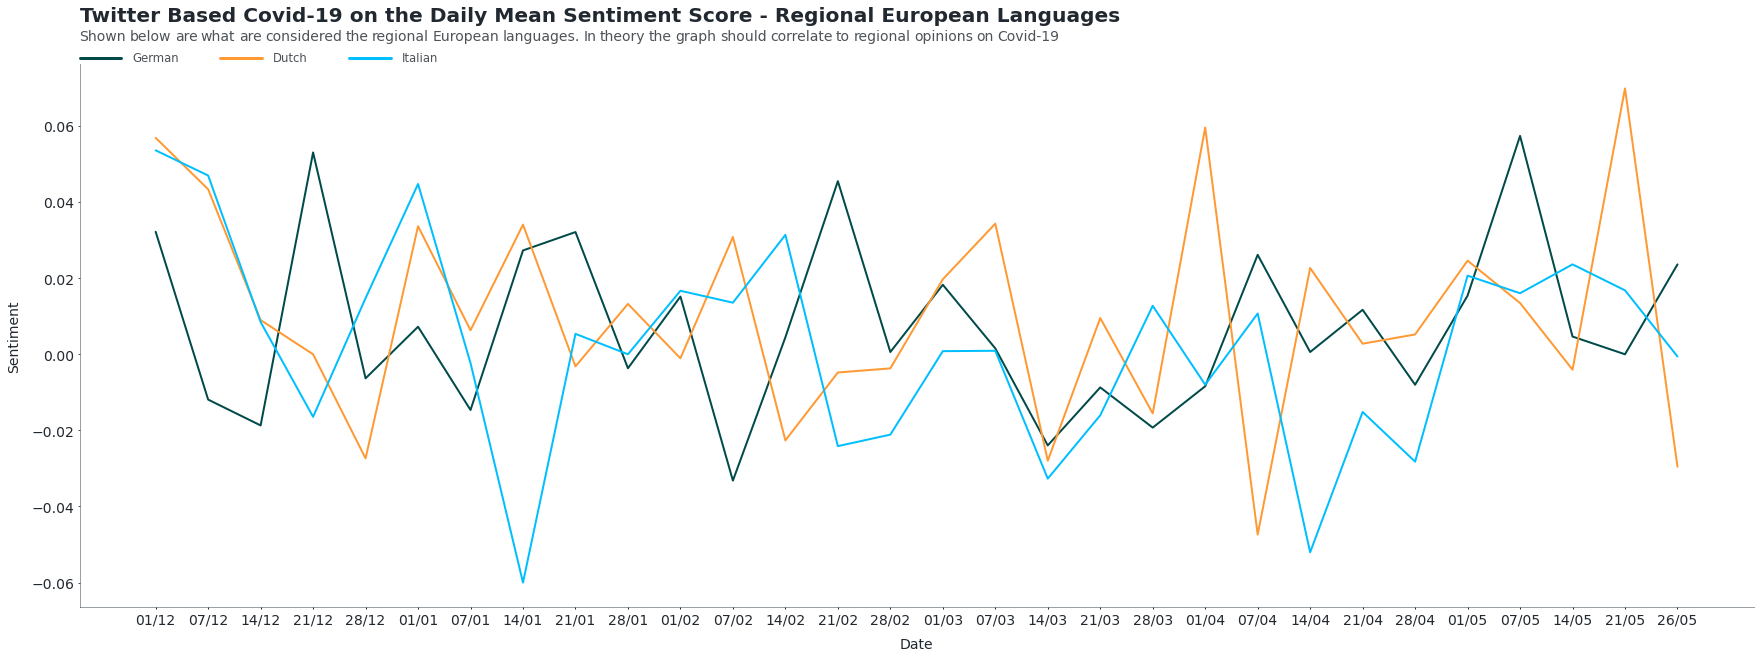

In [8]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), Language[4], **style, **de_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[5], **style, **nl_style, with_legend=True)
viz.draw_time_series(range(0, 30), Language[6], **style, **it_style, with_legend=True)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Daily Mean Sentiment Score - Regional European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the regional European languages.
                    In theory the graph should correlate to regional opinions on Covid-19""", align='justify')
viz.savefig(fname='Output/Daily Mean Europe',dpi=300, bbox_inches='tight')
viz.show()

# Daily Sentiment Classification Plots

While easy to get, the daily mean sentiment does not provide enough information to identify trends. Instead the raw
compound scores will be loaded and classified into one of the following:

* very_positive
* positive
* neutral
* negative
* very_negative

A peak in the lines plotted for each classification should signify a public reaction to an event and it gravity.

In [9]:
LanguageDataFrames = defaultdict(lambda: [])

languages = {
                1: 'en',
                2: 'es',
                3: 'fr',
                4: 'de',
                5: 'nl',
                6: 'it',
            }

for month in tqdm(['December', 'January', 'February', 'March', 'April', 'May']):
    for day in [0, 1, 2, 3, 4]:
        for language in languages:
            path = 'Data/Analyzed Tweets/' + str(month) + str(day) + languages[language] + '.json'
            LanguageDataFrames[language].append(pd.read_json(path))

  0%|          | 0/6 [00:00<?, ?it/s]

Classify the scores.

In [10]:
distribution =  {
                    1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                    6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
                }

for l in [1,2,3,4,5,6]:
    for df in tqdm(LanguageDataFrames[l]):
        # df = df.T
        day = {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
        for item in df['Score']:
            if item >= 0.75:
                day['very_positive'].append(item)
            elif 0.25 <= item < 0.75:
                day['positive'].append(item)
            elif -0.25 <= item < 0.25:
                day['neutral'].append(item)
            elif -0.75 <= item < 0.25:
                day['negative'].append(item)
            elif item < -0.75:
                day['very_negative'].append(item)

        for c in distribution[l]:
            distribution[l][c].append(day[c])

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Get the count of the classifications

In [11]:
counts =    {
                1: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                2: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                3: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                4: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                5: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]},
                6: {'very_positive': [], 'positive':[], 'neutral':[], 'negative':[], 'very_negative':[]}
            }

for l in [1,2,3,4,5,6]:
    for d in distribution[l]:
        for item in distribution[l][d]:
            counts[l][d].append(len(item))

Here a function is written to facilitate the plots. New line styles are added.

In [12]:
vp_style = { 'color': '#00ff00', 'label': 'Very Positive' }
p_style = { 'color': '#4f7942', 'label': 'Positive' }
nn_style = { 'color': '#00bfff', 'label': 'Neutral' }
n_style = { 'color': '#801818', 'label': 'Negative' }
vn_style = { 'color': '#ff003f', 'label': 'Very Negative' }

def plotDistributionLines(count, title, caption, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), count['very_positive'], **style, **vp_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['positive'], **style, **p_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['neutral'], **style, **nn_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['negative'], **style, **n_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['very_negative'], **style, **vn_style, with_legend=True)

    plt.xticks(range(0, 30), date_range)
    # viz.set_xticks(range(0, 30))#, date_range
    viz.set_xlabel('Date')
    viz.set_ylabel('Count')
    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname='Output/Score Classification '+figname, dpi=300, bbox_inches='tight')


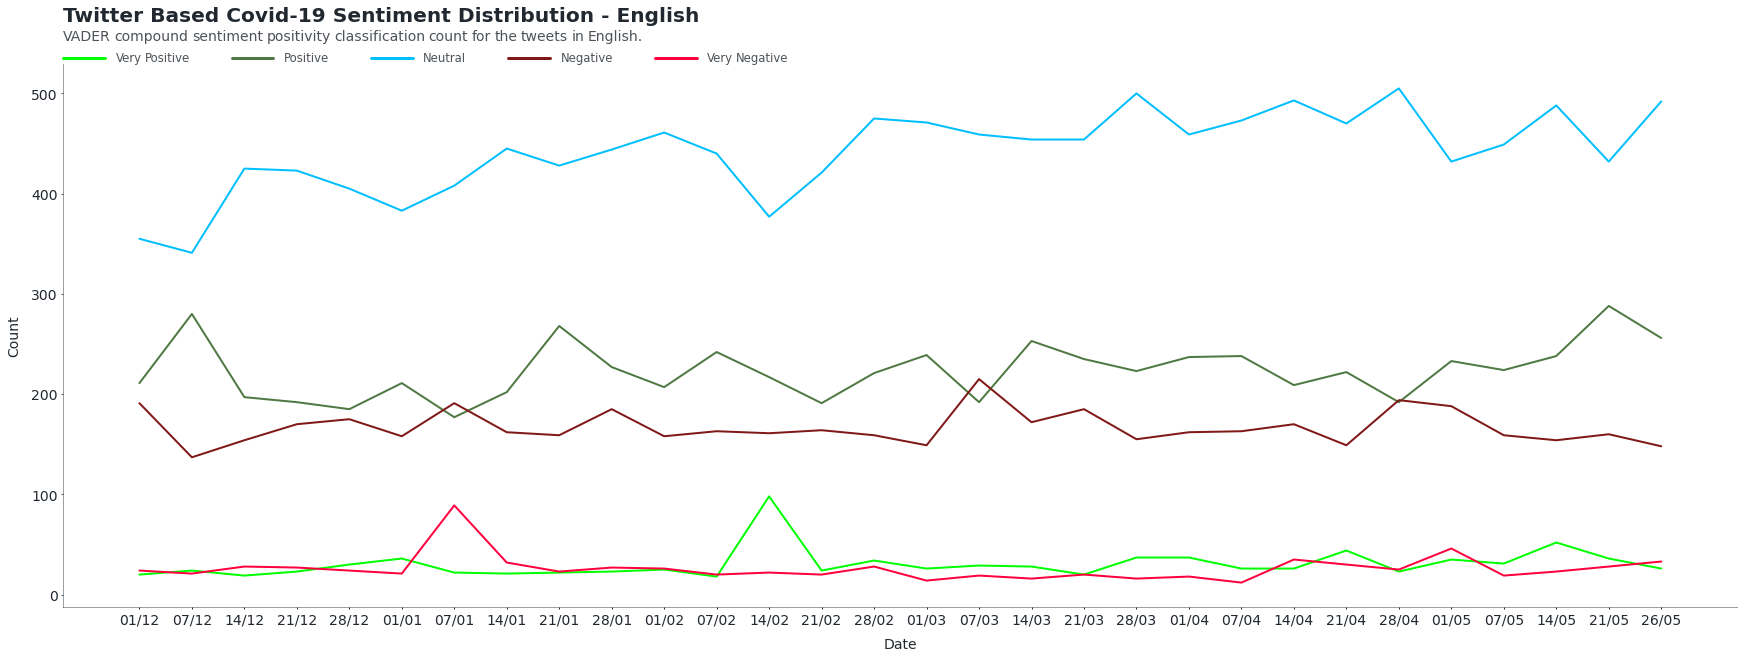

In [13]:
title = 'Twitter Based Covid-19 Sentiment Distribution - English'
caption = "VADER compound sentiment positivity classification count for the tweets in English."
figname = 'English Distribution'

plotDistributionLines(counts[1], title, caption, figname)


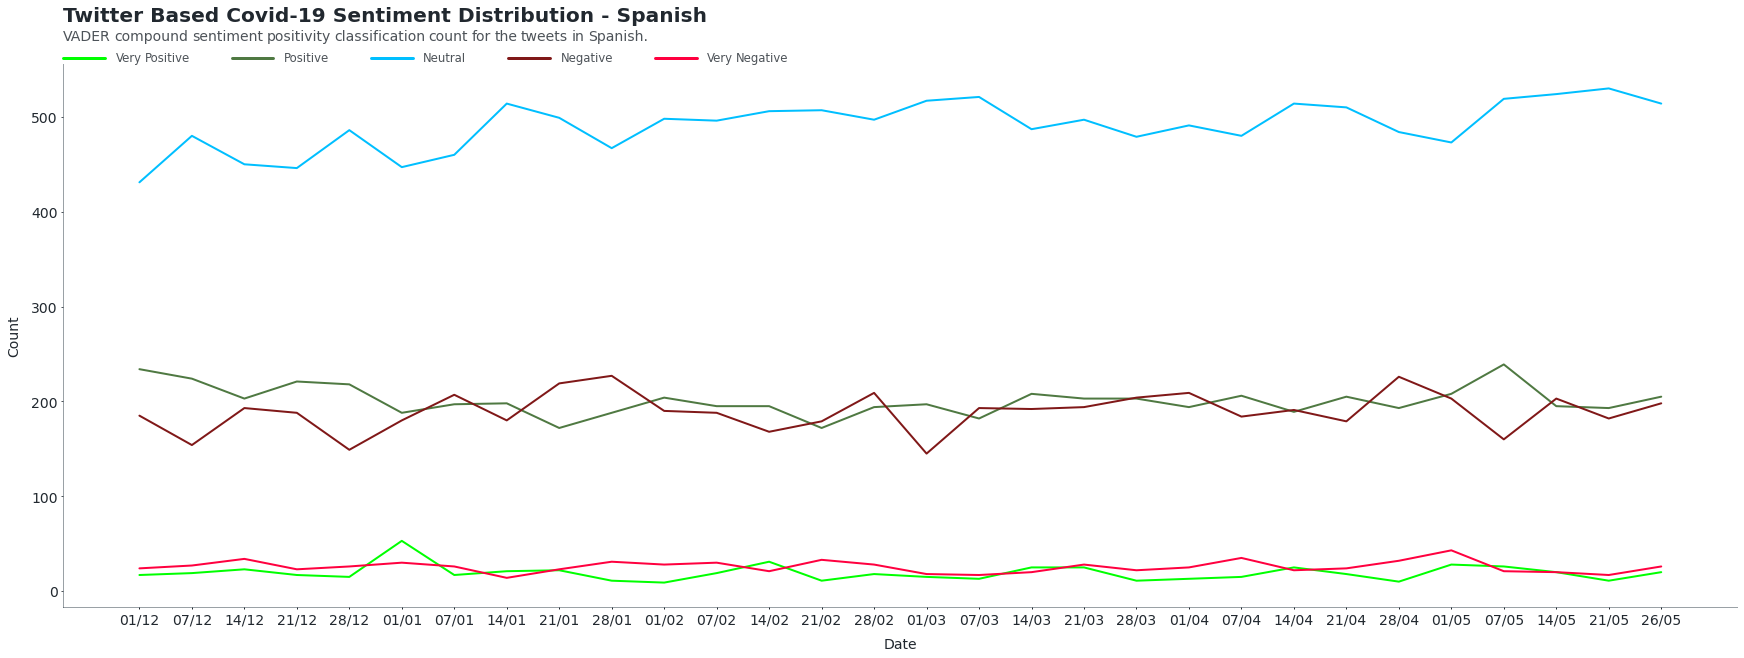

In [14]:
title = 'Twitter Based Covid-19 Sentiment Distribution - Spanish'
caption = "VADER compound sentiment positivity classification count for the tweets in Spanish."
figname = 'Spanish Distribution'

plotDistributionLines(counts[2], title, caption, figname)

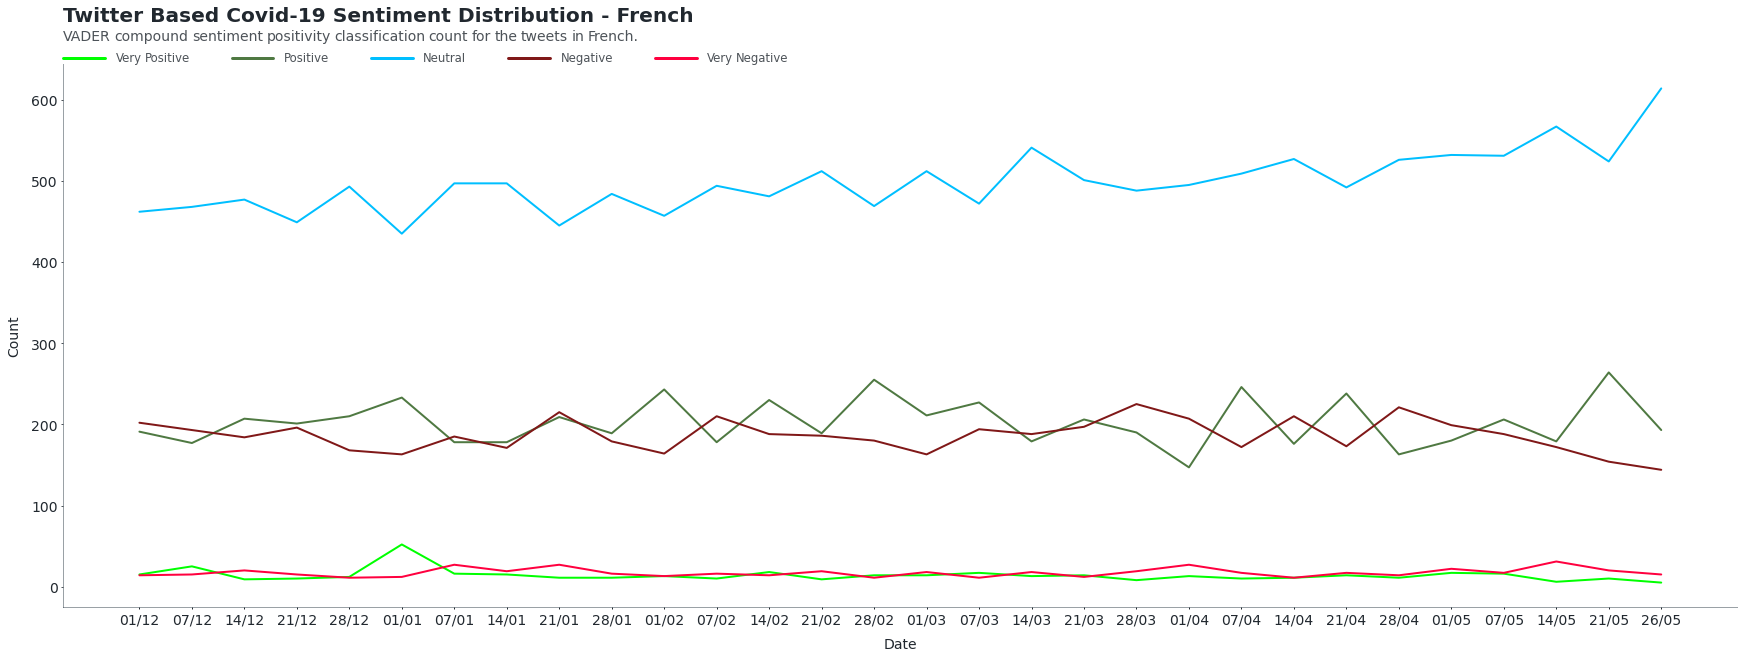

In [15]:

title = 'Twitter Based Covid-19 Sentiment Distribution - French'
caption = "VADER compound sentiment positivity classification count for the tweets in French."
figname = 'French Distribution'

plotDistributionLines(counts[3], title, caption, figname)

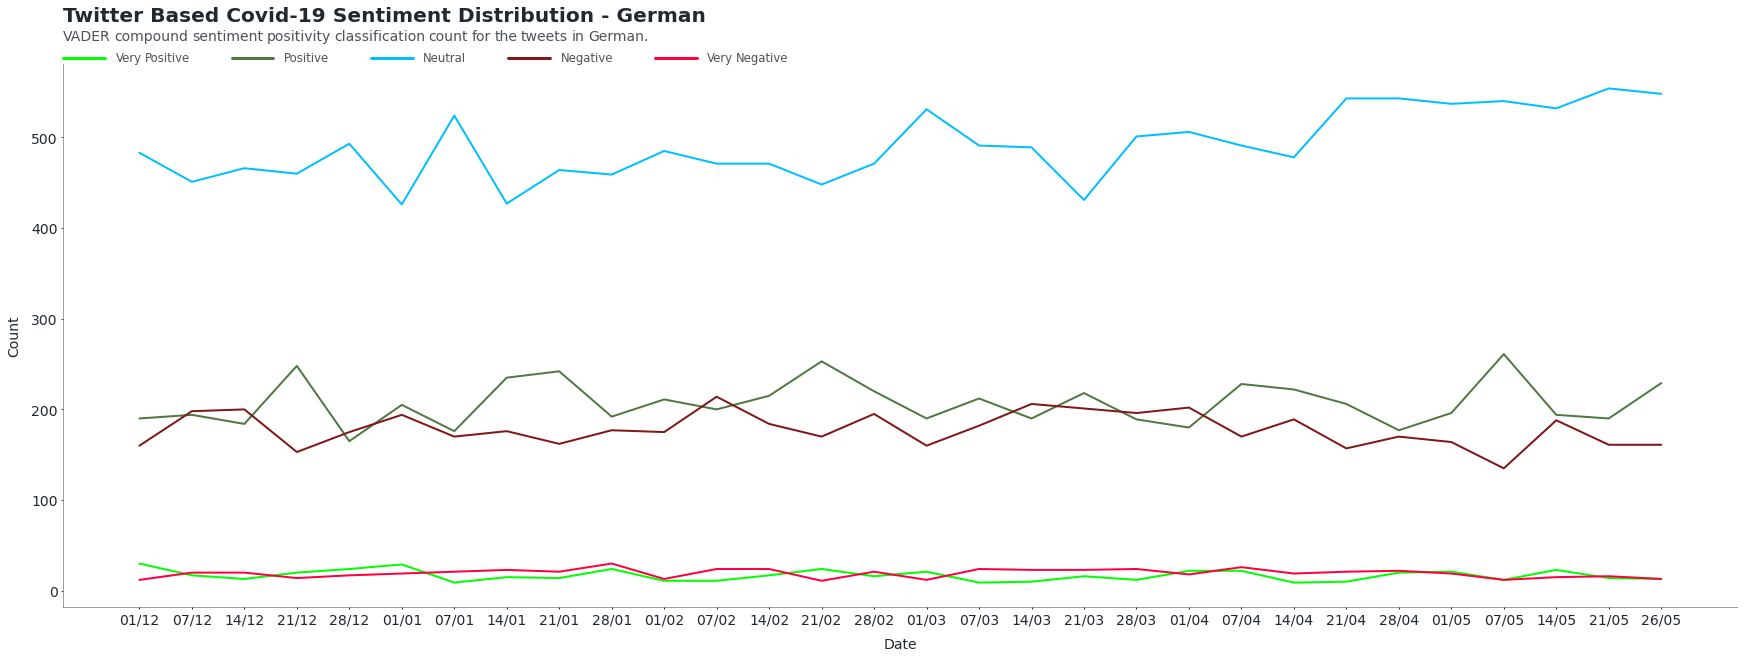

In [16]:

title = 'Twitter Based Covid-19 Sentiment Distribution - German'
caption = "VADER compound sentiment positivity classification count for the tweets in German."
figname = 'German Distribution'

plotDistributionLines(counts[4], title, caption, figname)


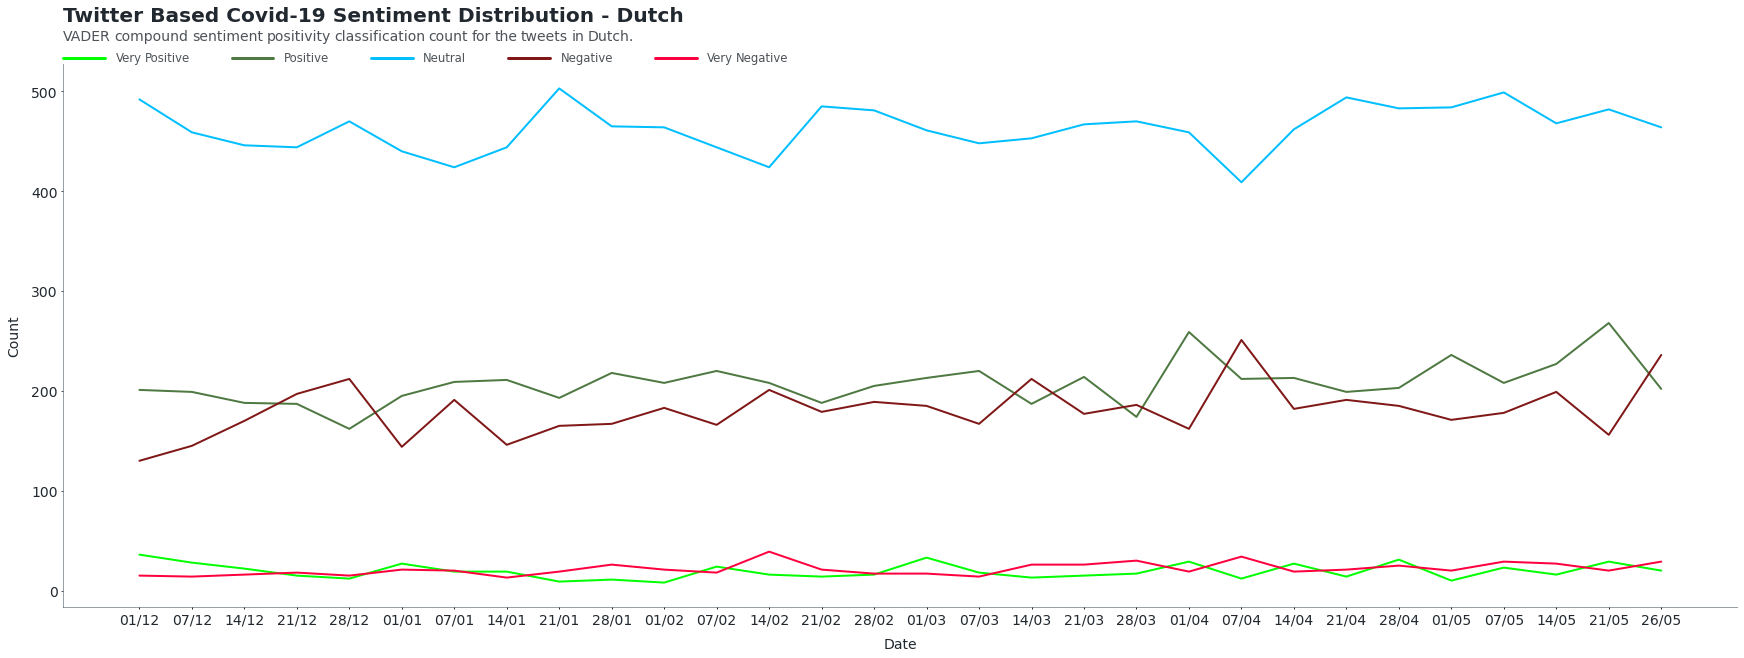

In [17]:

title = 'Twitter Based Covid-19 Sentiment Distribution - Dutch'
caption = "VADER compound sentiment positivity classification count for the tweets in Dutch."
figname = 'Dutch Distribution'

plotDistributionLines(counts[5], title, caption, figname)


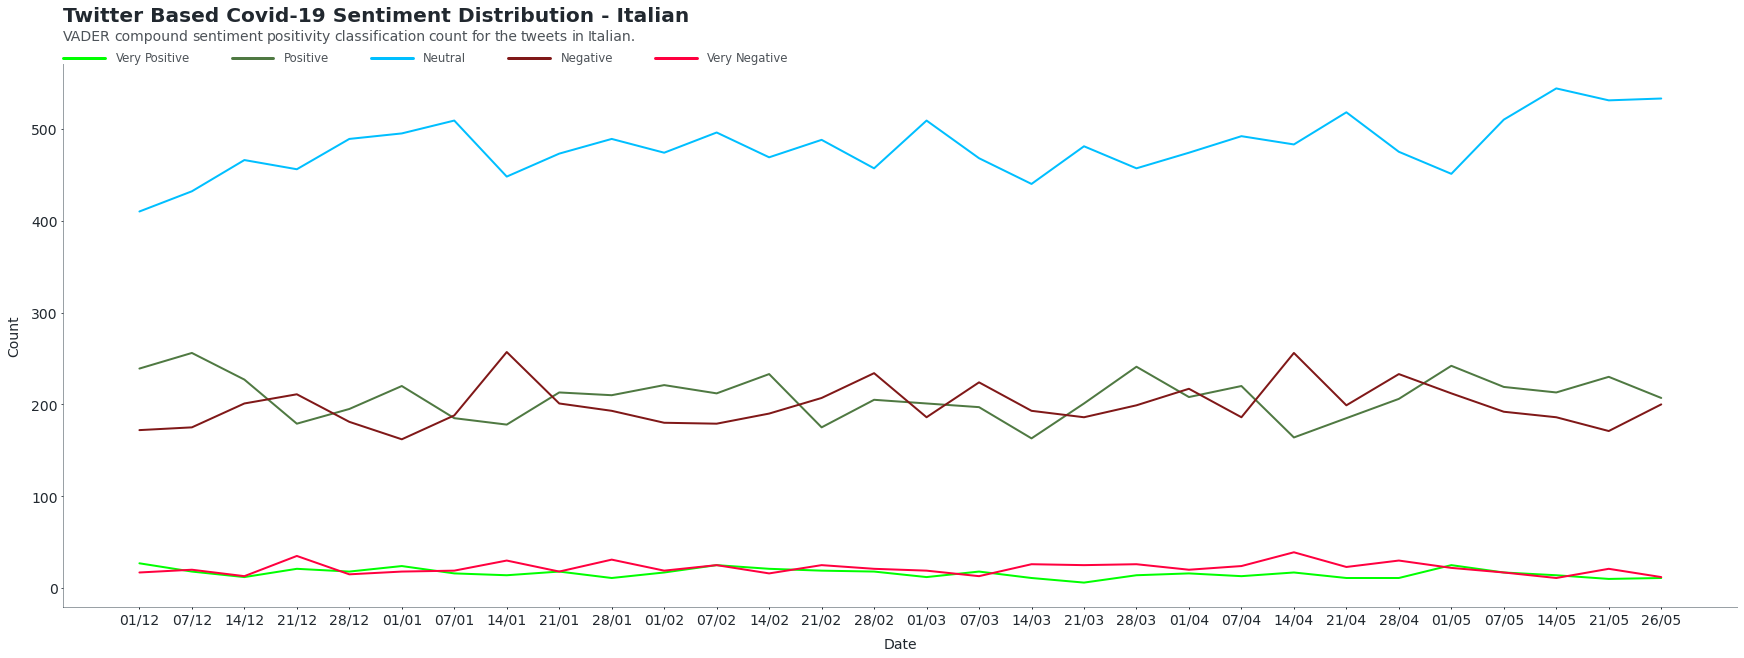

In [18]:

title = 'Twitter Based Covid-19 Sentiment Distribution - Italian'
caption = "VADER compound sentiment positivity classification count for the tweets in Italian."
figname = 'Italian Distribution'

plotDistributionLines(counts[6], title, caption, figname)

# Matching the plots with a Covid related event

The first step is to see whether to use the classification count plot or daily mean score plot to best visualize the
article sentiment.

# Daily Mean sentiment

In [19]:
CountryArticles = defaultdict(lambda: [])
ArticleMean = defaultdict(lambda: [])

root = 'Data/Analyzed Articles/'
if not os.access(root, os.R_OK):
    print("Check root!!")


for language in tqdm(os.listdir(root)):
    file_path = os.path.join(root, language)
    CountryArticles[language[14:-5]] = pd.read_json(file_path)

  0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
jsonarticles = json.load(open('Data/ArticleMeanSentiment.json'))
article_mean = {jsonarticles[id]['country']: jsonarticles[id]['day'] for id in jsonarticles}

In [21]:
tw_style = { 'color': '#00bfff', 'label': 'Tweet' }
ar_style = { 'color': '#bd33a4', 'label': 'Article' }
def plotMeanArticleVSTwitter(articles, tweets, title, caption, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), articles, **style, **ar_style, with_legend=True)
    viz.draw_time_series(range(0, 30), tweets, **style, **tw_style, with_legend=True)

    plt.xticks(range(0, 30), date_range)
    viz.set_xlabel('Date')
    viz.set_ylabel('Sentiment')

    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname='Output/'+figname, dpi=300, bbox_inches='tight')

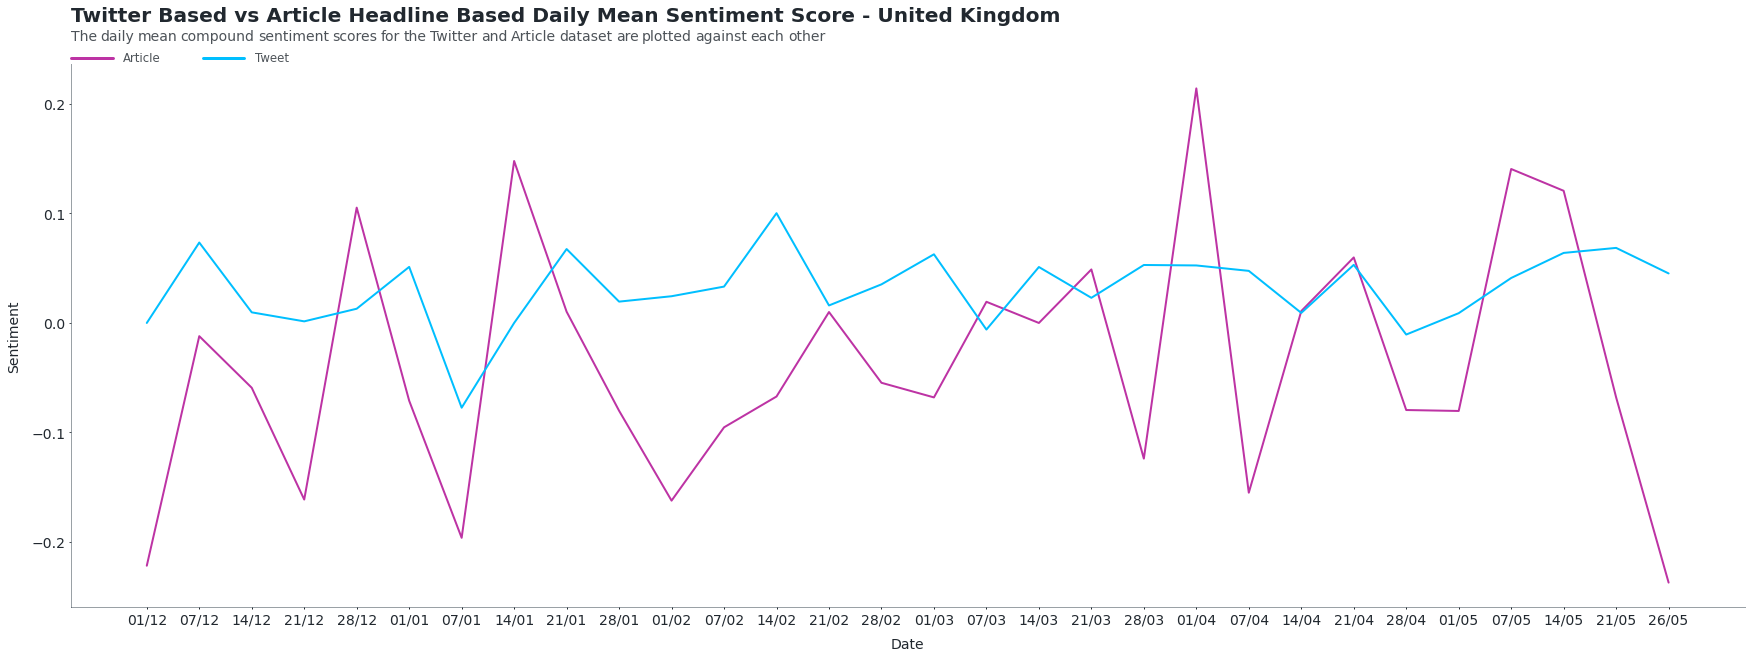

In [22]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - United Kingdom'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted against each other"
figname = 'Daily Mean Article VS Twitter UK'

plotMeanArticleVSTwitter(article_mean['UK'], Language[1], title, caption, figname)

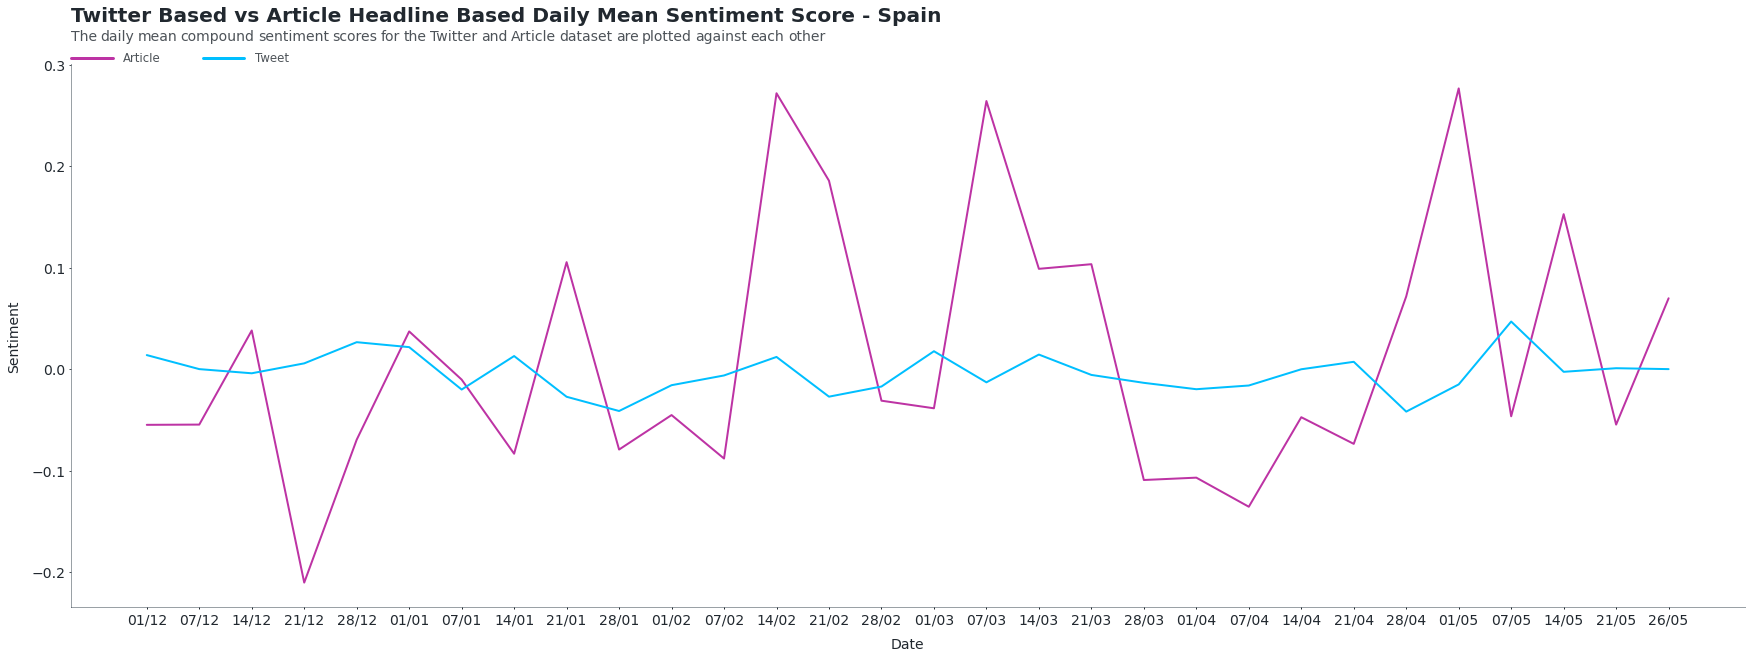

In [23]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Spain'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted against each other"
figname = 'Daily Mean Article VS Twitter Spain'

plotMeanArticleVSTwitter(article_mean['Spain'], Language[2], title, caption, figname)

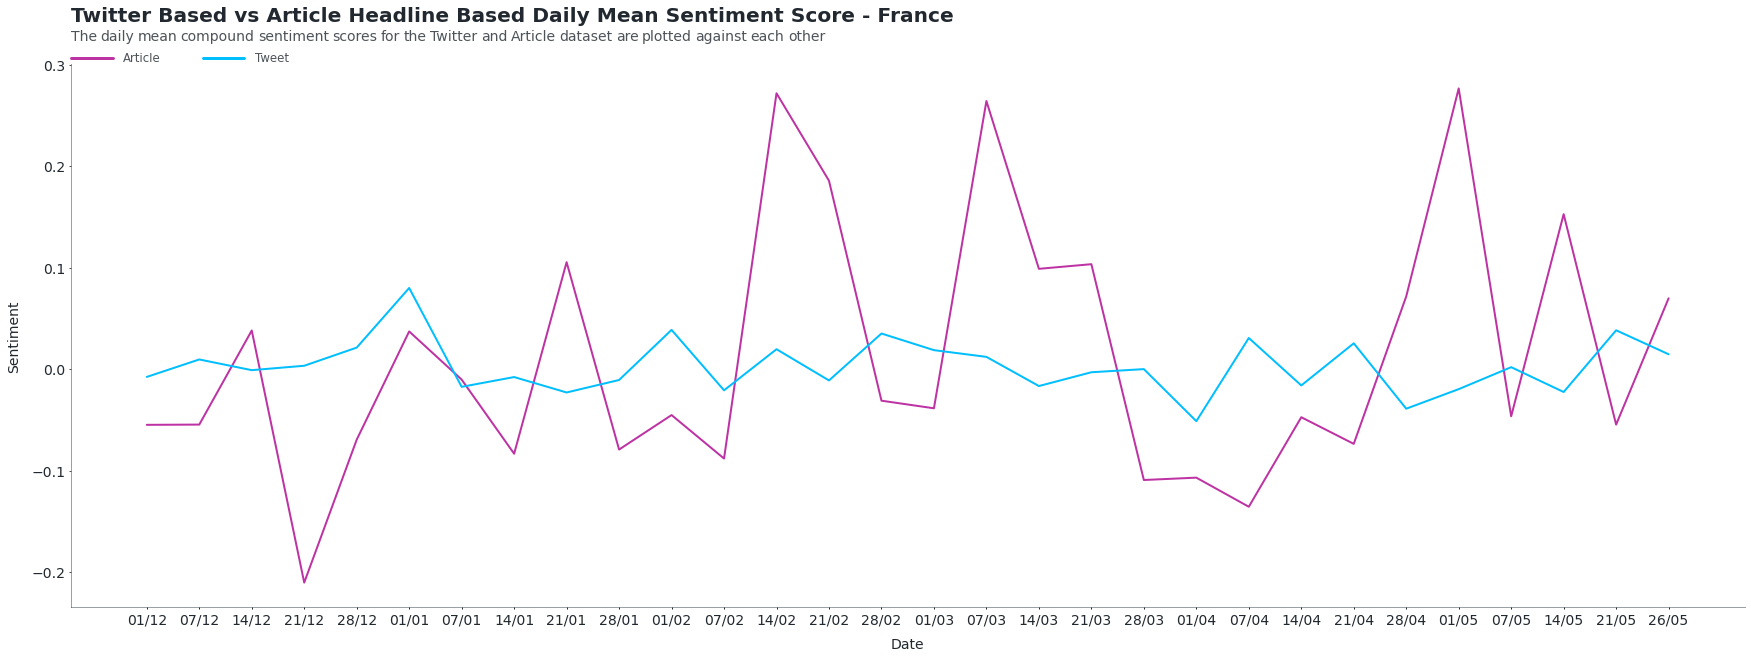

In [24]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - France'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted against each other"
figname = 'Daily Mean Article VS Twitter France'

plotMeanArticleVSTwitter(article_mean['France'], Language[3], title, caption, figname)

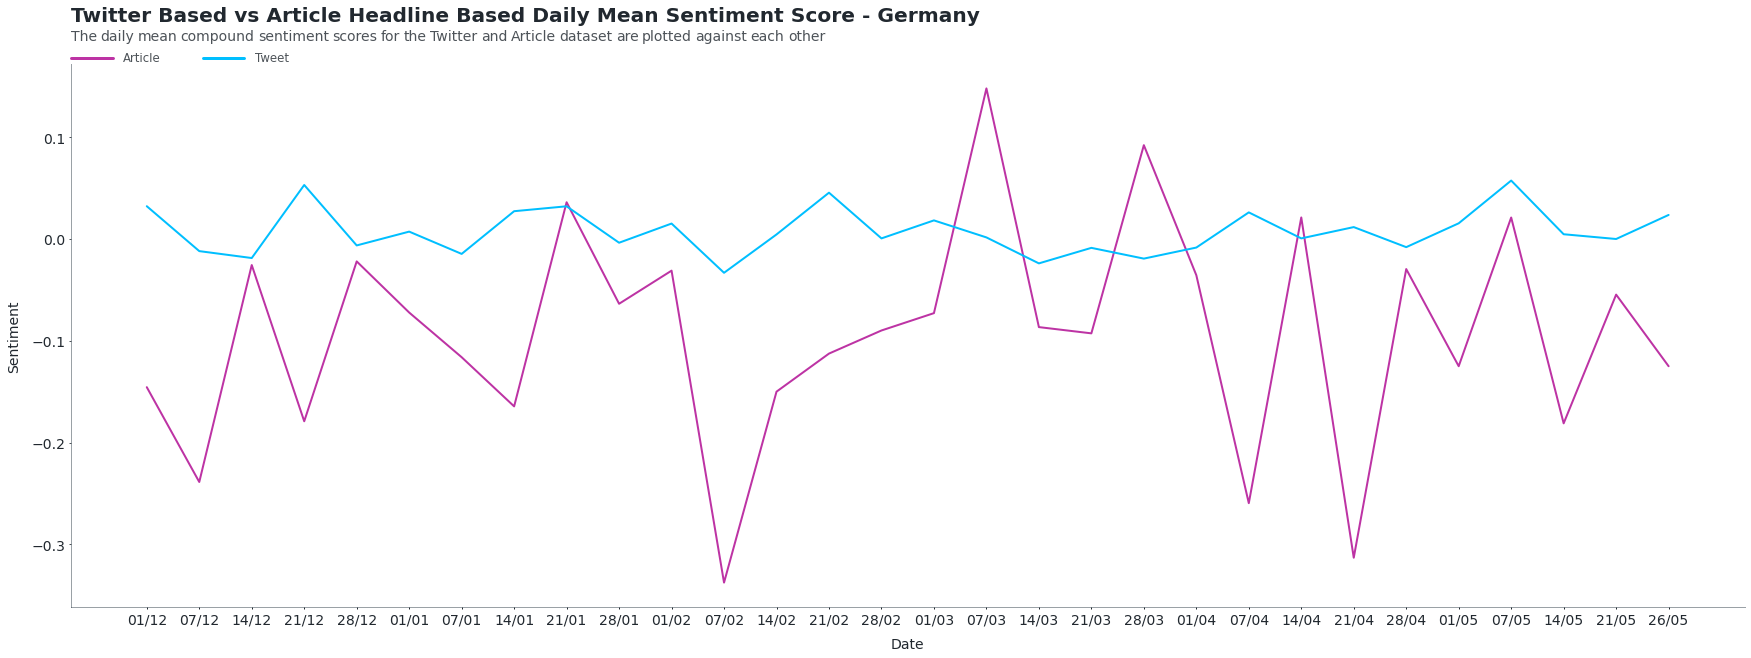

In [25]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Germany'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted against each other"
figname = 'Daily Mean Article VS Twitter Germany'

plotMeanArticleVSTwitter(article_mean['Germany'], Language[4], title, caption, figname)

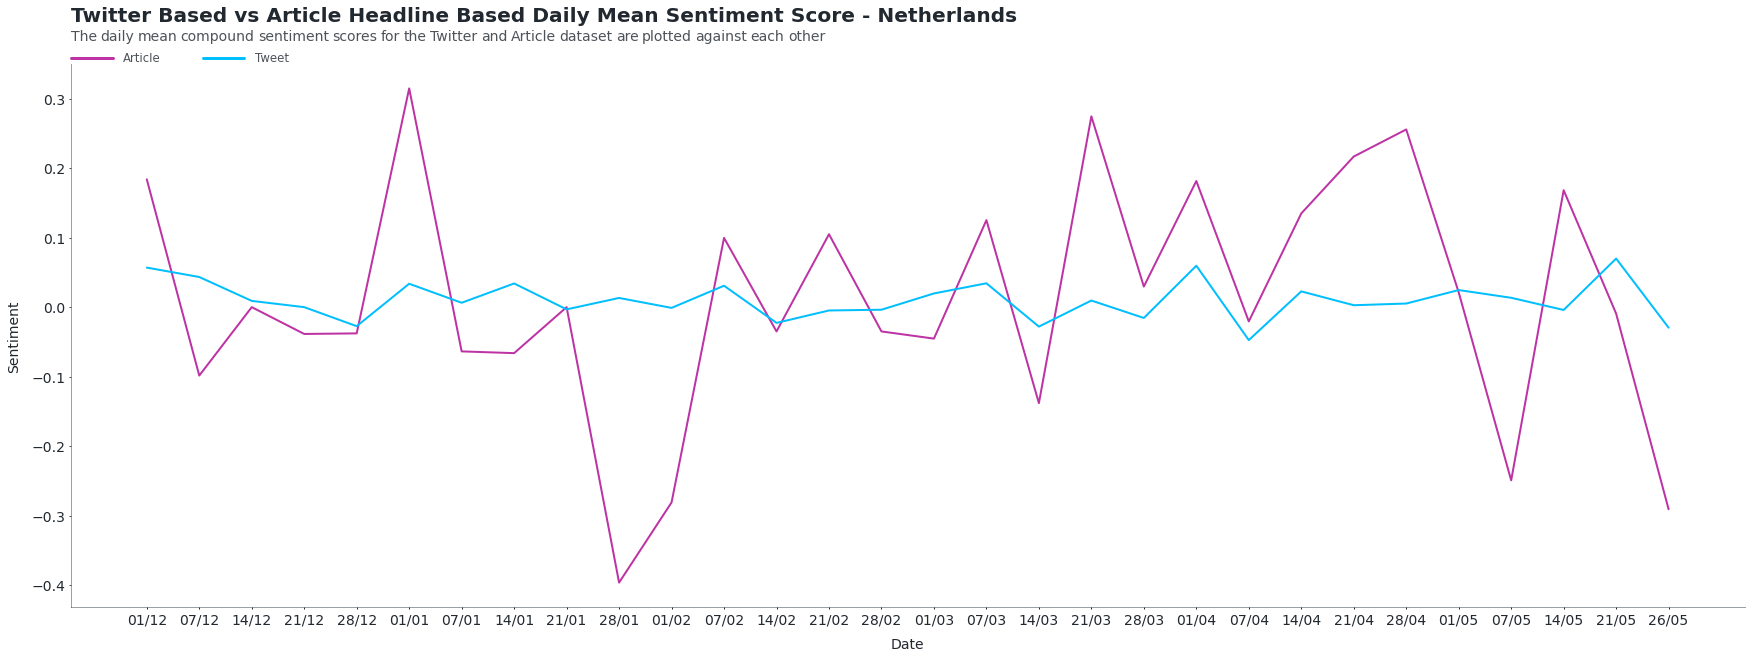

In [26]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Netherlands'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted against each other"
figname = 'Daily Mean Article VS Twitter Netherlands'

plotMeanArticleVSTwitter(article_mean['Netherlands'], Language[5], title, caption, figname)

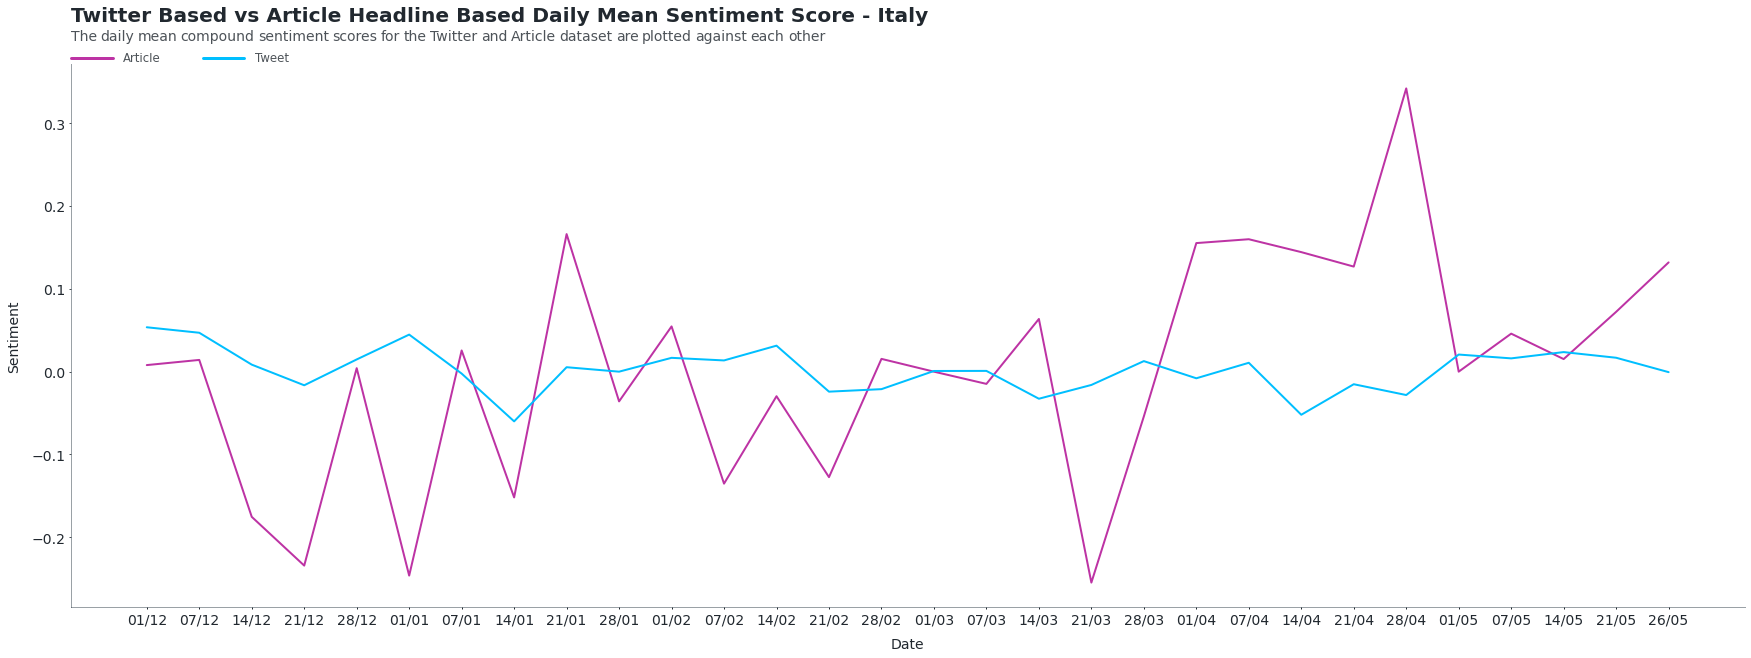

In [27]:
title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Italy'
caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted against each other"
figname = 'Daily Mean Article VS Twitter Italy'

plotMeanArticleVSTwitter(article_mean['Italy'], Language[6], title, caption, figname)

# Daily Sentiment Classification Plots with Article Mean Sentiment

In [28]:
def plotDistributionLinesWithMean(count, title, caption, mean, figname):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), [((m*100)+300) for m in mean], **style, **ar_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['very_positive'], **style, **vp_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['positive'], **style, **p_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['neutral'], **style, **nn_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['negative'], **style, **n_style, with_legend=True)
    viz.draw_time_series(range(0, 30), count['very_negative'], **style, **vn_style, with_legend=True)

    plt.xticks(range(0, 30), date_range)
    # viz.set_xticks(range(0, 30))#, date_range
    viz.set_xlabel('Date')
    viz.set_ylabel('Count')
    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')
    viz.savefig(fname='Output/Article Mean and Score Classification '+figname, dpi=300, bbox_inches='tight')

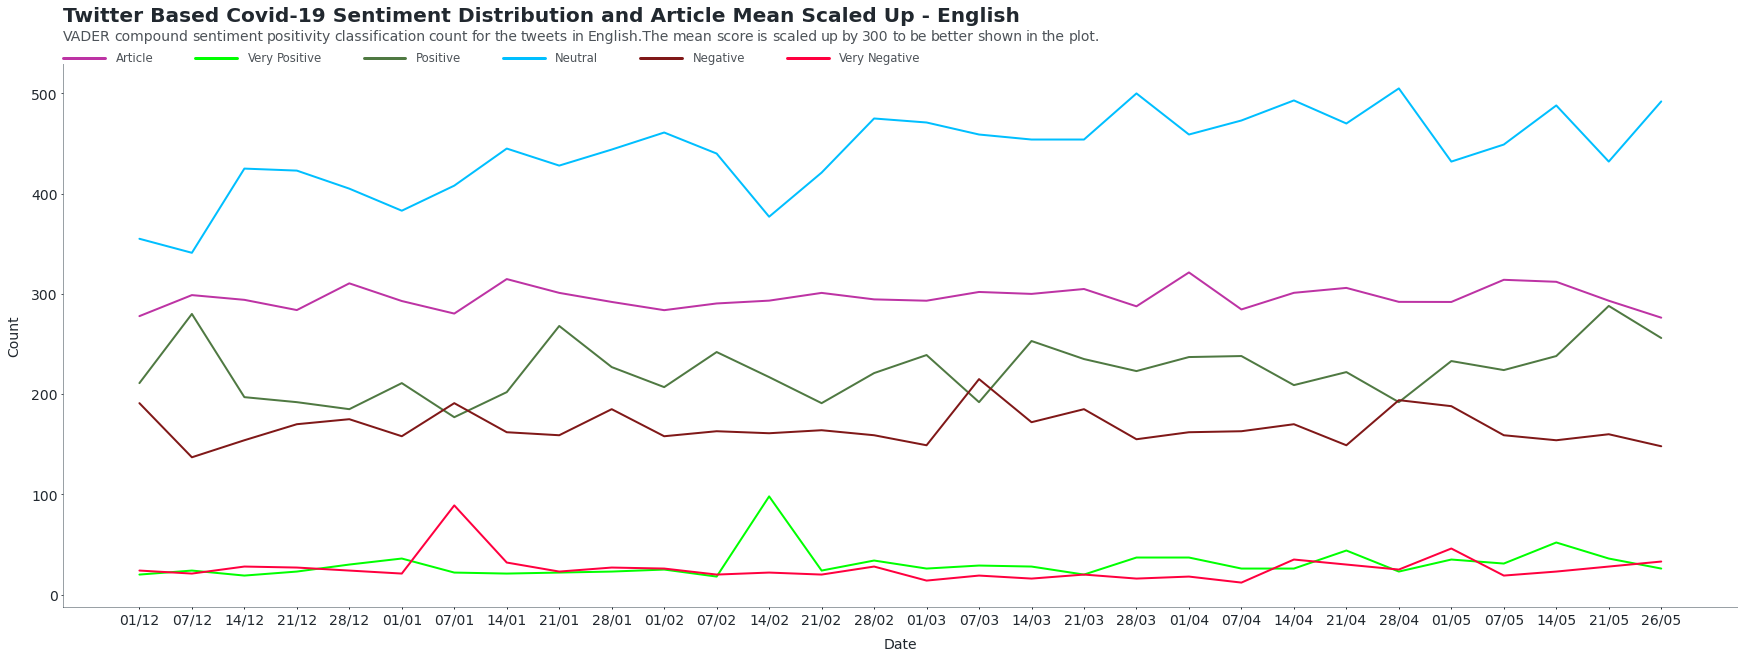

In [29]:
title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - English'
caption = "VADER compound sentiment positivity classification count for the tweets in English." \
          "The mean score is scaled up by 300 to be better shown in the plot."
figname = 'English Distribution'

plotDistributionLinesWithMean(counts[1], title, caption, article_mean['UK'], figname)


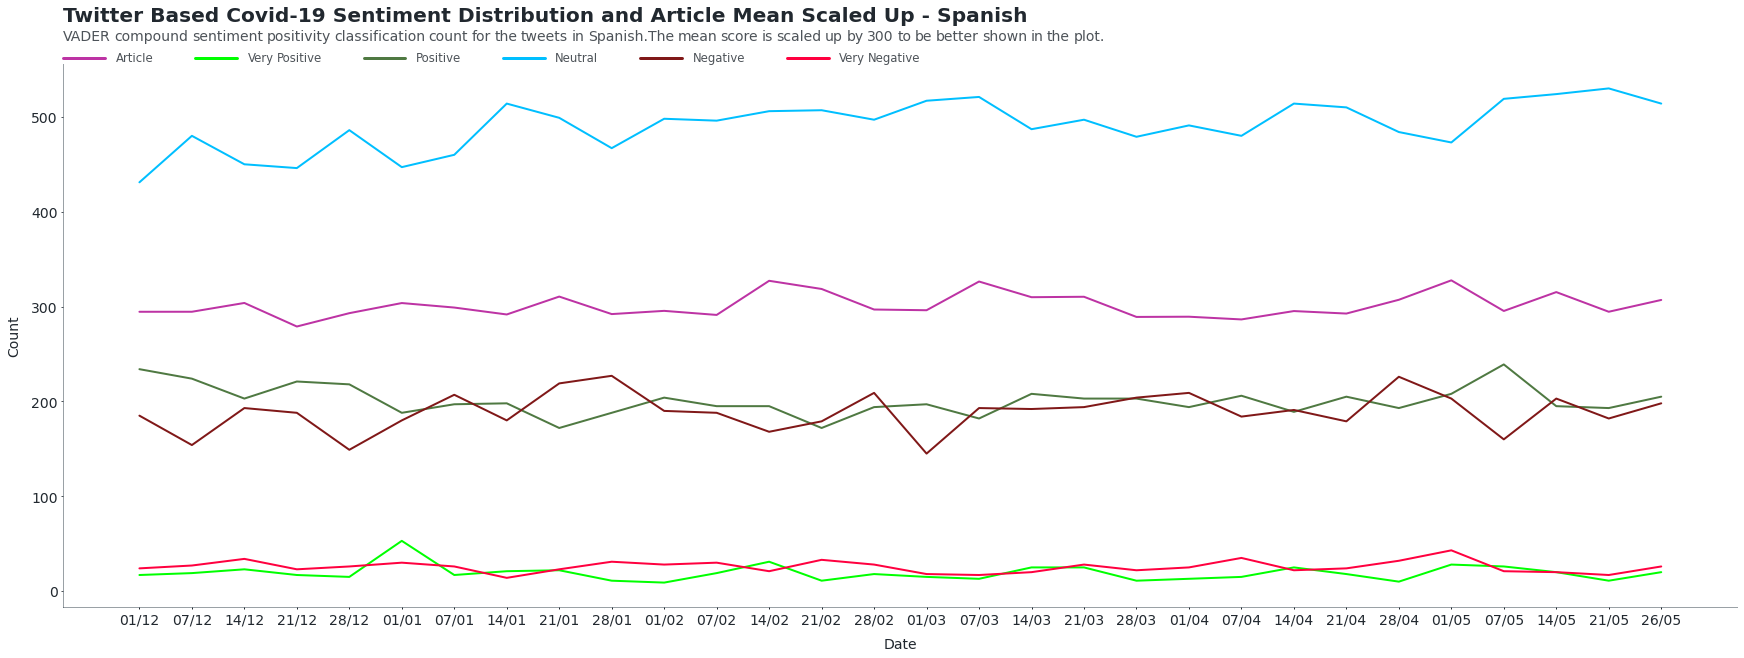

In [30]:
title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - Spanish'
caption = "VADER compound sentiment positivity classification count for the tweets in Spanish." \
          "The mean score is scaled up by 300 to be better shown in the plot."
figname = 'Spanish Distribution'

plotDistributionLinesWithMean(counts[2], title, caption, article_mean['Spain'], figname)

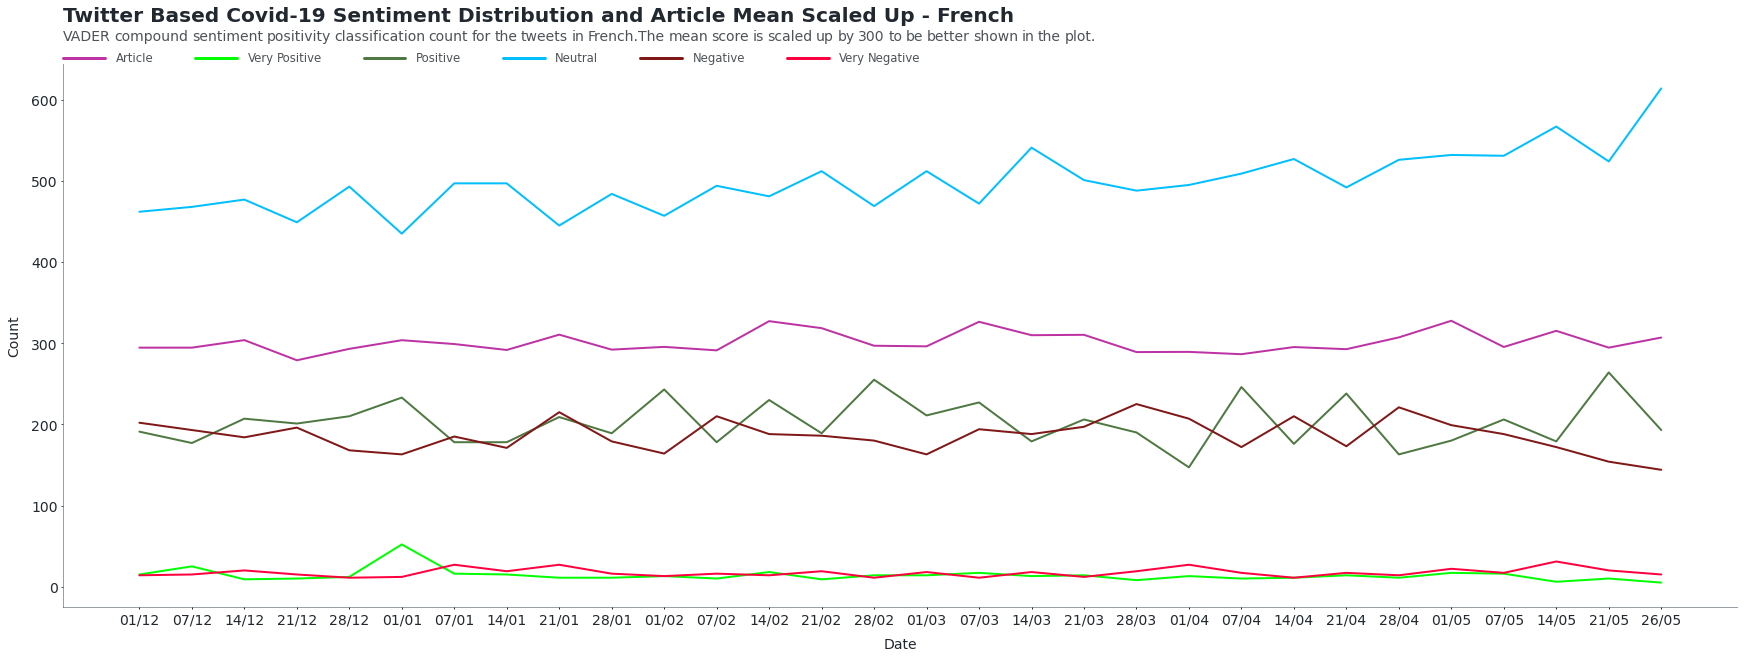

In [31]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - French'
caption = "VADER compound sentiment positivity classification count for the tweets in French." \
          "The mean score is scaled up by 300 to be better shown in the plot."
figname = 'French Distribution'

plotDistributionLinesWithMean(counts[3], title, caption, article_mean['France'], figname)

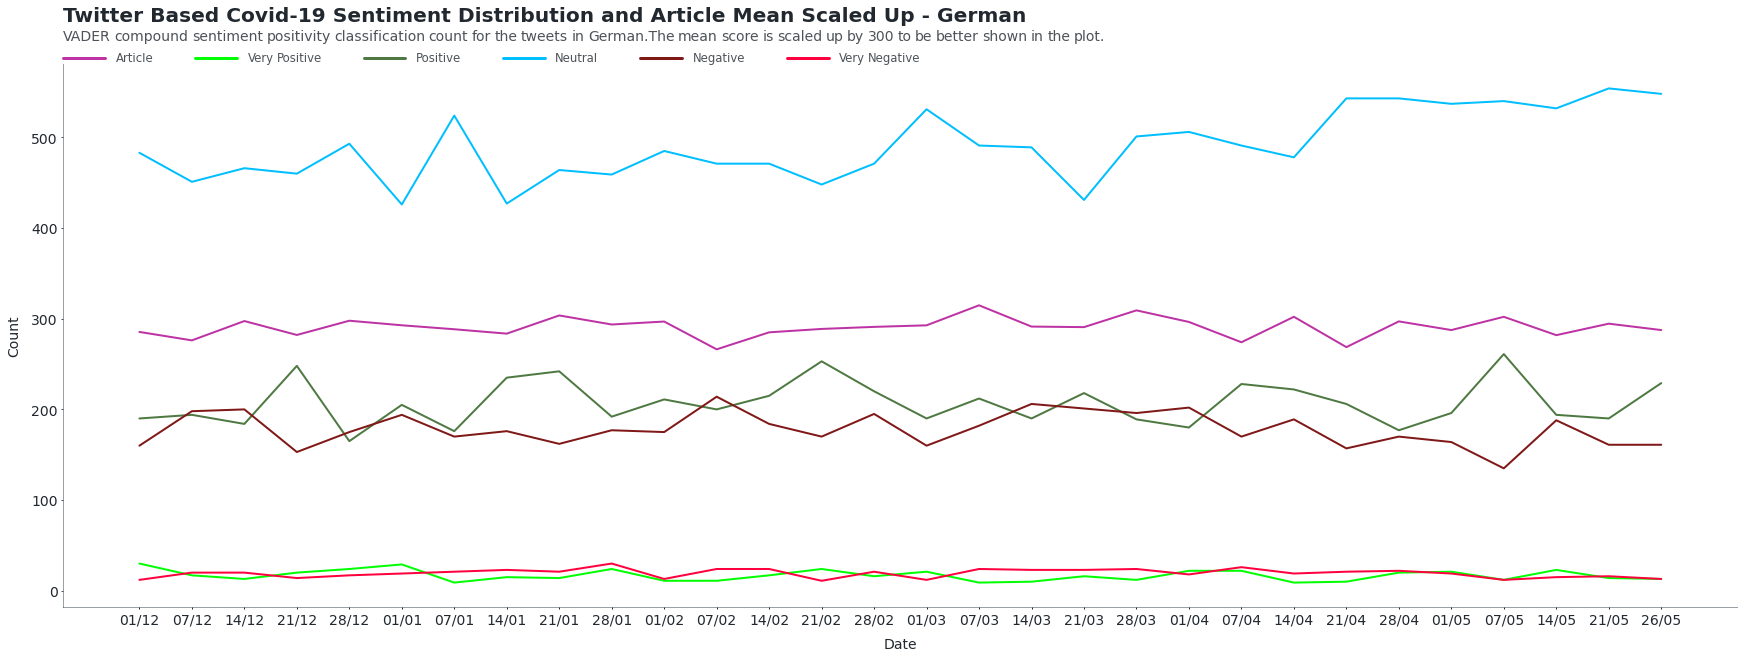

In [32]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - German'
caption = "VADER compound sentiment positivity classification count for the tweets in German." \
          "The mean score is scaled up by 300 to be better shown in the plot."
figname = 'German Distribution'

plotDistributionLinesWithMean(counts[4], title, caption, article_mean['Germany'], figname)

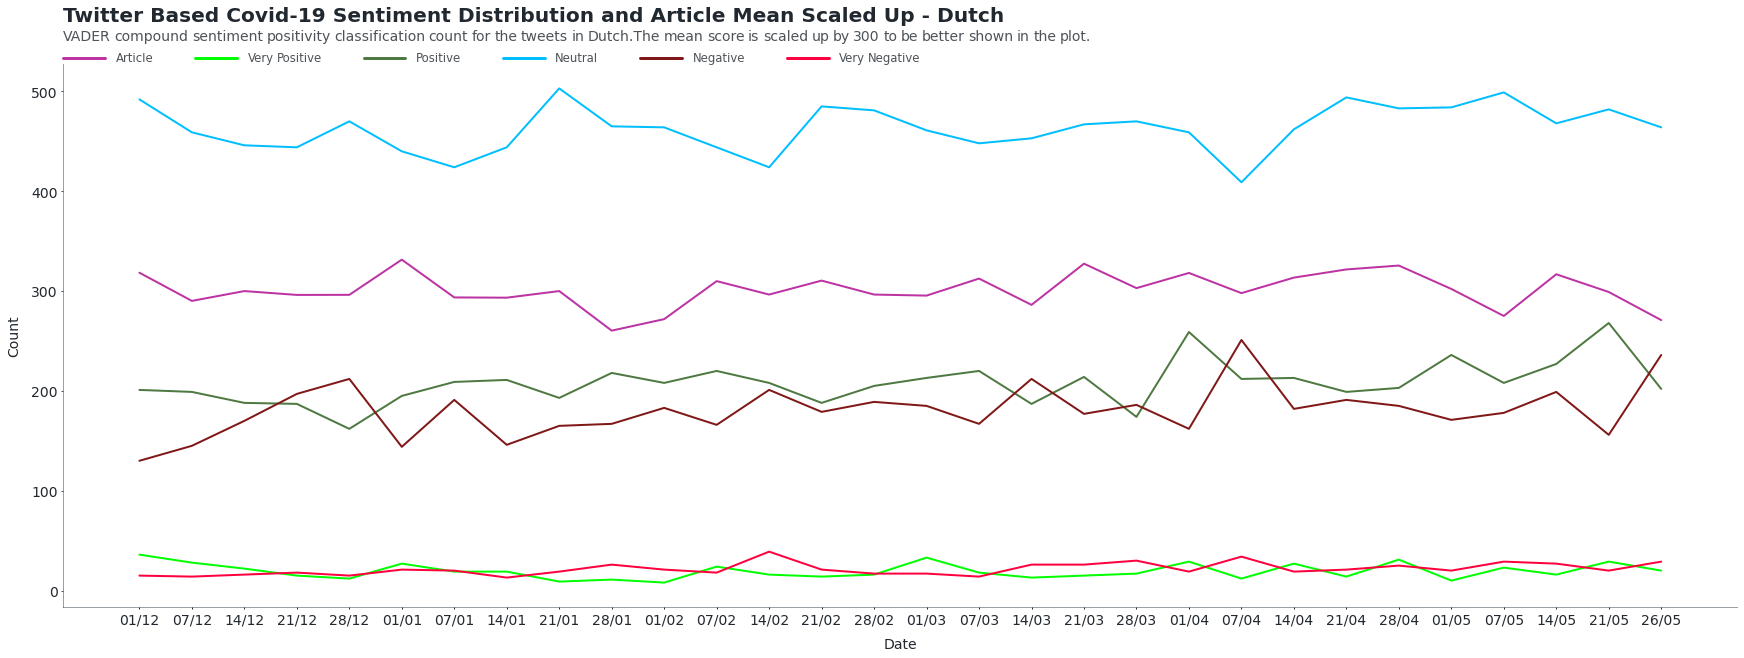

In [33]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - Dutch'
caption = "VADER compound sentiment positivity classification count for the tweets in Dutch." \
          "The mean score is scaled up by 300 to be better shown in the plot."
figname = 'Dutch Distribution'

plotDistributionLinesWithMean(counts[5], title, caption, article_mean['Netherlands'], figname)

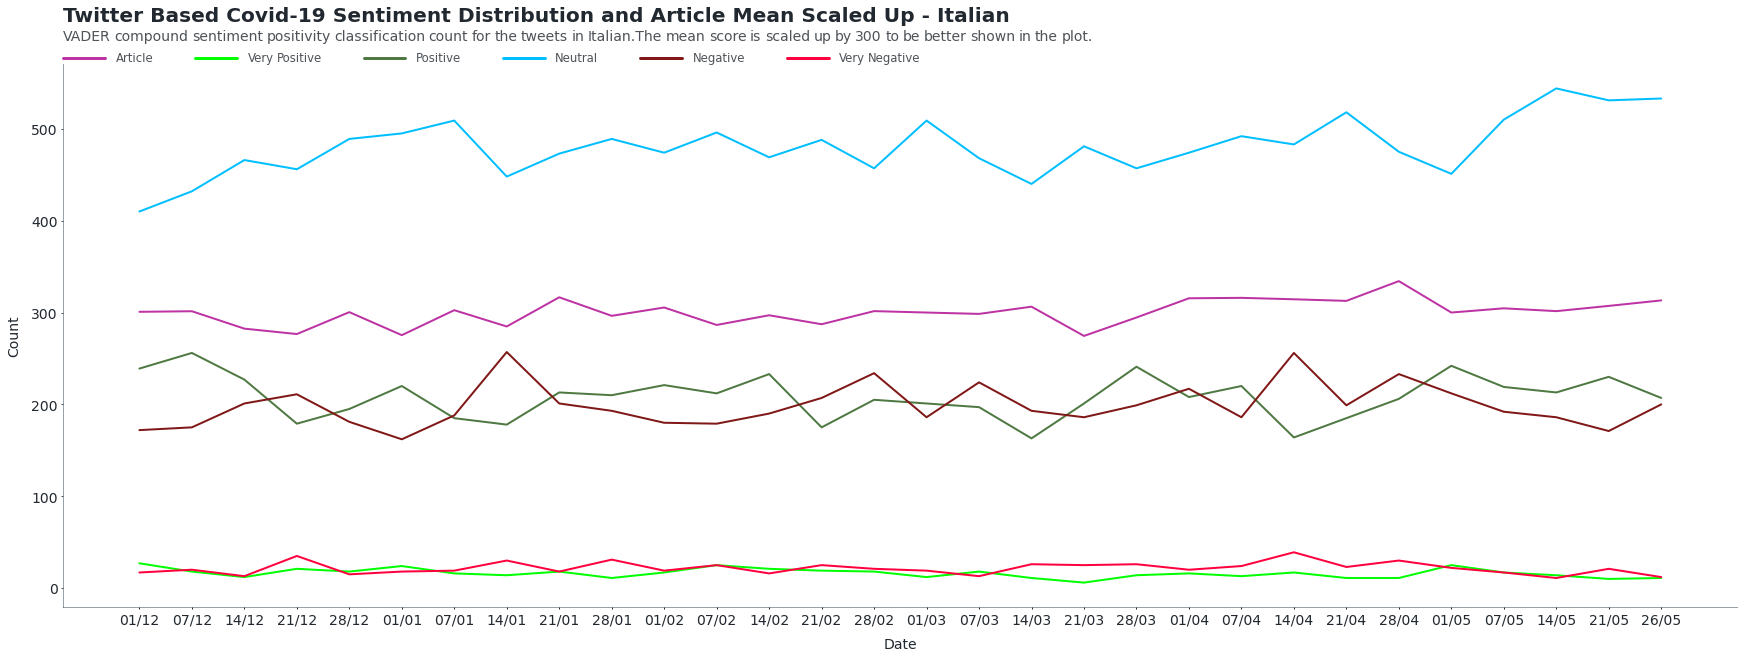

In [34]:

title = 'Twitter Based Covid-19 Sentiment Distribution and Article Mean Scaled Up - Italian'
caption = "VADER compound sentiment positivity classification count for the tweets in Italian." \
          "The mean score is scaled up by 300 to be better shown in the plot."
figname = 'Italian Distribution'

plotDistributionLinesWithMean(counts[6], title, caption, article_mean['Italy'], figname)

# Match Tweet with Article Headline

In [35]:
# create a general style for annotations and their markers
annotation_style = { 'fontsize': 'small', 'va': 'bottom', 'align': 'right', 'pad': 0.25 }
marker_style = { 'marker': 'o', 'markersize': 8 }

# create specific styles so that the annotation and the time series have the same color
tweet_annotation_style = { 'color': '#00bfff' }
article_annotation_style = { 'color': '#bd33a4' }

def plotMeanArticleVSTwitterNoSave(articles, tweets, title, caption):
    figure = plt.figure(figsize=(30, 10))
    viz = drawable.Drawable(figure)
    viz.draw_time_series(range(0, 30), articles, **style, **ar_style, with_legend=True)
    viz.draw_time_series(range(0, 30), tweets, **style, **tw_style, with_legend=True)

    plt.xticks(range(0, 30), date_range)
    viz.set_xlabel('Date')
    viz.set_ylabel('Sentiment')

    viz.set_title(title, loc='left')
    viz.set_caption(caption, align='justify')

For the following visualizations the annotations where taken from the collected dataset

a maximum of 3 each are displayed to avoid clutter

In [36]:
# title = 'Twitter Based vs Article Headline Based Daily Mean Sentiment Score - Italy'
# caption = "The daily mean compound sentiment scores for the Twitter and Article dataset are plotted against each other"
#
# plotMeanArticleVSTwitterNoSave(article_mean['Italy'], Language[6], title, caption)
#
# viz.annotate('Breaks record after scoring in 11 matches in a row', (6, 14), 14,
#              marker=marker_style, **annotation_style, **tweet_annotation_style)
# viz.annotate('Top scorer', (30, 38), 25,
#              marker=marker_style, **annotation_style, **article_annotation_style)
